In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

## FBI API Data

For our analysis, we've picked the FBI data.
Main FBI terms used in this dataset:

--> LEOKA: Law Enforcement Officers Killed and Assaulted

--> NIBRS: National Incident-Based Reporting System

In [67]:
project_key = api_keys.data_key
base_url = "https://api.usa.gov/crime/fbi/sapi/api/participation/national?api_key=" + project_key
req = requests.get(base_url).json()
#print(req)

In [7]:
fbi=list(req.values())
#print(fbi)
#print(fbi[0])

#for i in fbi[0]:
    #print(i['data_year']) 

In [8]:
fbi_data = {"data_year":[],
        "population":[],
        "total_agency_count" : [],
        "published_agency_count" : [],
        "active_agency_count" : [],
        "covered_agency_count" : [],
        "population_covered" : [],
        "agency_count_nibrs_submitting" : [],
        "agency_count_leoka_submitting" : [],
        "agency_count_pe_submitting" : [],
        "agency_count_srs_submitting" : [],
        "agency_count_asr_submitting" : [],
        "agency_count_hc_submitting" : [],
        "agency_count_supp_submitting" : [],
        "nibrs_population_covered" : [],
        "total_population" : []}

for i in fbi[0]:
    fbi_data["data_year"].append(i['data_year'])
    fbi_data["population"].append(i['population'])
    fbi_data["total_agency_count"].append(i['total_agency_count'])
    fbi_data["published_agency_count"].append(i['published_agency_count'])
    fbi_data["active_agency_count"].append(i['active_agency_count'])
    fbi_data["covered_agency_count"].append(i['covered_agency_count'])
    fbi_data["population_covered"].append(i['population_covered'])
    fbi_data["agency_count_nibrs_submitting"].append(i['agency_count_nibrs_submitting'])
    fbi_data["agency_count_leoka_submitting"].append(i['agency_count_leoka_submitting'])
    fbi_data["agency_count_pe_submitting"].append(i['agency_count_pe_submitting'])
    fbi_data["agency_count_srs_submitting"].append(i['agency_count_srs_submitting'])
    fbi_data["agency_count_asr_submitting"].append(i['agency_count_asr_submitting'])
    fbi_data["agency_count_hc_submitting"].append(i['agency_count_hc_submitting'])
    fbi_data["agency_count_supp_submitting"].append(i['agency_count_supp_submitting'])
    fbi_data["nibrs_population_covered"].append(i['nibrs_population_covered'])
    fbi_data["total_population"].append(i['total_population'])


fbi_data_df = pd.DataFrame.from_dict(fbi_data)
fbi_data_df.head(5)

,data_year,population,total_agency_count,published_agency_count,active_agency_count,covered_agency_count,population_covered,agency_count_nibrs_submitting,agency_count_leoka_submitting,agency_count_pe_submitting,agency_count_srs_submitting,agency_count_asr_submitting,agency_count_hc_submitting,agency_count_supp_submitting,nibrs_population_covered,total_population
0,2019,337556149,18671,14993,22021,16,18660,8536,8356,15004,7786,11788,15520,15643,146950904,337556149
1,2018,336536616,18560,15236,21896,39,18737,7777,7122,15247,8200,13057,16107,15615,129148182,336536616
2,2017,335231625,18448,16393,21764,29,51097,7148,6680,16399,9381,13684,16285,15578,109218573,335231625
3,2016,329242793,18466,16921,21625,28,111631,7083,6388,16927,9986,13661,15940,15785,105287171,329242793
4,2015,327511036,18435,16813,21551,20,40665,6823,6223,16815,10102,13434,15096,15655,99789318,327511036


## 2 Hypothesis

1) Compared to last 2 decades of the 20th century (1980-2000), the count of population covered by the FBI 
increased by 20% in the first 2 decades of the 21st century (2000-2019)


2) Compared to the previous 5 years (2010 - 2014), the percentage of officers who got killed or assaulted increased
in the last 5 years (2015-2019) due to the increased amount of the illegal weapons


## Hypothesis 1 - Analysis

In [9]:
hyp1_df = fbi_data_df[0:40]
first_decade=fbi_data_df[0:19] #selecting all data that belongs to the first 2 decades of 21st century
first_decade_covered_population = first_decade["nibrs_population_covered"].sum()
first_decade_total_population = first_decade["population"].sum()

In [10]:
first_decade_percent = first_decade_covered_population/first_decade_total_population

In [29]:
first_decade_percent

0.27979465476066495

In [11]:
second_decade = fbi_data_df[20:40] #selecting all data that belongs to the last 2 decades of 20st century

In [12]:
second_decade_covered_population = second_decade["nibrs_population_covered"].sum()
second_decade_total_population = second_decade["population"].sum()

In [13]:
second_decade_percent = second_decade_covered_population/second_decade_total_population

In [14]:
second_decade_percent

0.04200547338570496

In [34]:
#increase = first_decade_percent - second_decade_percent

In [15]:
fbi_hyp1 = {"Covered population": [second_decade_covered_population, first_decade_covered_population] ,
            "Total population": [second_decade_total_population, first_decade_total_population],
            "Covered percent": [second_decade_percent, first_decade_percent]}

fbi_hyp1_df = pd.DataFrame(fbi_hyp1, index = [1,2])

## Hypothesis 1 - Visualization 1
Based on the bar chart below, the population covered by the NIBRS (National Incident-Based Reporting System) increased by 566.099% in the last 2 decades (2000-2019) compared to the previous 2 decades (1980-2000).


In [16]:
fbi_hyp1_df

,Covered population,Total population,Covered percent
1,213416681,5080687439,0.042005
2,1671895631,5975438067,0.279795


In [18]:
#calculation the % change using this formula: % increase = Increase ÷ Original Number × 100.
increase = 0.279795 - 0.042005
finalNum = (0.23779/0.042005)*100
finalNum

566.0992738959648

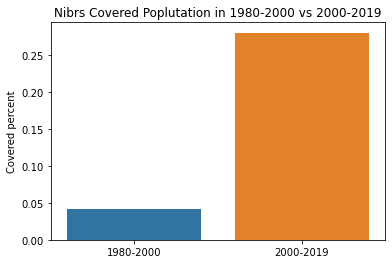

In [19]:
import seaborn as sns
labels = ["1980-2000", "2000-2019"]
sns.barplot(x= labels, y=fbi_hyp1_df["Covered percent"])
plt.title("Nibrs Covered Poplutation in 1980-2000 vs 2000-2019")
plt.show()

## Hypothesis 1 - Visualization 2
Based on the scatterplot below, we can see that up until the population reached 250 million, the nibrs (National Incident-Based Reporting System) was 0, and from that poin it started to steadily grow until the present days. During the last few years it grew very quickly.

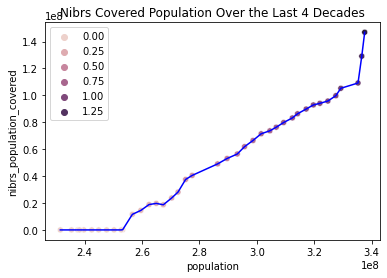

In [66]:
import seaborn as sns
sns.scatterplot(x = hyp1_df["population"], y = hyp1_df["nibrs_population_covered"], hue = hyp1_df["nibrs_population_covered"]  )
sns.lineplot(x = hyp1_df["population"], y = hyp1_df["nibrs_population_covered"], color = 'blue' )
plt.title("Nibrs Covered Population Over the Last 4 Decades")
plt.title("Nibrs Covered Population Over the Last 4 Decades")
plt.show() 

## Hypothesis 2 - Analysis

In [22]:
# hypothesis 2 : Compared to the previous 5 years (2010 - 2014), the percentage of officers who got killed
#or assaulted increased in the last 5 years (2015-2019) due to the increased amount of the illegal weapons
hyp2_df = fbi_data_df[0:10]
first_five=fbi_data_df[0:5]
second_five=fbi_data_df[5:10]
sum1 = fbi_data_df["population"].iloc[0] - fbi_data_df['population'].iloc[5]
sum2 = fbi_data_df["population"].iloc[5] - fbi_data_df['population'].iloc[10]
#summing the agency_count_leoka_submitting column for each time segment
first_leoka = np.average(first_five["agency_count_leoka_submitting"])
second_leoka = np.average(second_five["agency_count_leoka_submitting"])
first_total = np.average(first_five["population"])
second_total = np.average(second_five["population"])
first_percent_leoka = (first_leoka/sum1)*100
second_percent_leoka = (second_leoka/sum2)*100
fbi_hyp2 = {"Leoka": [first_leoka,second_leoka] ,
            "Total Population increase": [sum1, sum2],
            "Leoka Percent": [first_percent_leoka, second_percent_leoka]}
fbi_hyp2_df = pd.DataFrame(fbi_hyp2, index = [1,2])
#30.33 % increase in average leoka per population increase in last 5 years (2015-2019)
#compared to previous 5 years (2010-2014).

## Hypothesis 2 - Visualization 1
Based on the bar chart below, there was a 30.33% increase in leoka(Law Enforcement Officers Killed and Assaulted) cases per population in the last five years (2015-2019) compared to the previous 5 years (2010-2014)

In [23]:
fbi_hyp2_df #dataframe with analysis

,Leoka,Total Population increase,Leoka Percent
1,6953.8,12821050,0.054237
2,5148.4,12371716,0.041614


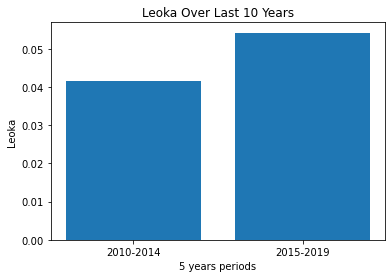

In [25]:
plt.bar(['2010-2014', '2015-2019'], [0.041614, 0.054237], label = "plot")
plt.xlabel('5 years periods')
plt.ylabel('Leoka')
plt.title('Leoka Over Last 10 Years')
plt.show()

## Hypothesis 2 - Visualization 2
The scatterplot below displays the increase of leoka cases over the period of last 10 years.

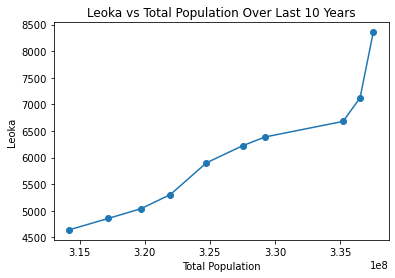

In [49]:
fig, ax = plt.subplots()
ax.scatter(hyp2_df["population"],hyp2_df["agency_count_leoka_submitting"])
ax.plot(hyp2_df["population"],hyp2_df["agency_count_leoka_submitting"])
ax.set_xlabel("Total Population")
ax.set_ylabel("Leoka")
ax.set_title("Leoka vs Total Population Over Last 10 Years")
plt.show()